# 1. Business Understanding

#### 1.1. Project Overview

Tanzania is a country with a population of 57 million. It faces significant challenges in providing clean and reliable water to its population.
The country has established numerous water points to meet this need but many of these water points are not fully functional, with some requiring repairs and others have failed entirely.
This project aims to predict the functionality of these water pumps, distingishing between those that are fully functional, those that need repairs and those that do not work at all

#### 2.1. Objective
The primary objective is to develop a predictive model that can accurately classify the operational status of water pumps into one of three categories:
- Functional: The water pump is fully operational and provides clean water.
- Needs repair: The water pump is operational but requires some maintenance or repair to ensure optimal performance.
- Non-Functional: The water pump has failed and is not providing water.

#### 3.1. Stakeholders
- Non-Governmental Organizations(NGOs): Various NGOs involved in providing support for wells needing repairs in Tanzania
- Government of Tanzania throught the Tanzanian Ministry of Water: The government is looking to find patterns in non-functional wells to influence how new wells are built

#### 4.1. Key Questions
1. What are the critical factors influencing the functionality of water pumps in Tanzania?
2. How can we use historical data to predict the current operational status of a water pump?
3. What are the cost implications of accurately predicting pump functionality?
4. How can this model be intergrated into existing maintenance workflows to maximize its impact?


# 2. Data Understanding

#### Import the necessary python packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.impute import SimpleImputer
# import numpy as np
# from scipy.stats import zscore

ModuleNotFoundError: No module named 'missingno'

#### Loading the Data

In [13]:
# Viewing the first five rows of the dataset

# Load data
train_values = pd.read_csv('Data/Training-set-values.csv')
train_labels = pd.read_csv('Data/Training-set-labels.csv')

# Display the first few rows of the train-values dataset
print("Train Values:")
display(train_values.head())

# Display the first few rows of the train-labels dataset
print("\nTrain Labels:")
display(train_labels.head())

# Check the shape of the datasets
print("\nShape of Train Values:", train_values.shape)
print("Shape of Train Labels:", train_labels.shape)

Train Values:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe



Train Labels:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Shape of Train Values: (59400, 40)
Shape of Train Labels: (59400, 2)


>  **Key Insights:**
> - Based on the above, I can confirm that we have a large dataset with 59,400 water points, which is good for training a predictive model.
>- The datatset includes various types of features, such as numerical, categorical and geographical
>- I have also identified that `status_group` is my primary target variable


#### Inspecting the Loaded Data

In [14]:
# Get summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
display(train_values.describe())

# Check for missing values in the dataset
print("\nMissing Values in Train Values:")
display(train_values.isnull().sum())

# Check for data types of each feature
print("\nData Types in Train Values:")
display(train_values.dtypes)

Summary Statistics for Numerical Features:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000



Missing Values in Train Values:


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_


Data Types in Train Values:


id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

> **Key Insights:**
> - Based on the above, `amount_tsh` has a high proportion of zero values which could indicate that many water points have no water.
> - Some key features such as `scheme_name` and `scheme_management` have missing data which needs to be addressed.
> - Feature `date_recorded` has been stored as an `object` and needs to be converted to a `datetime` for analysis.


#### Target Variable Exploration


Distribution of Target Variable:


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64


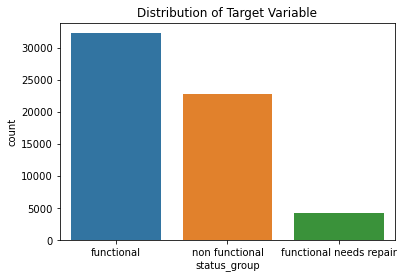

In [17]:
# Merge train-values and train-labels to explore the target variable
train_data = train_values.merge(train_labels, on='id')

# Display the distribution of the target variable
print("\nDistribution of Target Variable:")
display(train_data['status_group'].value_counts())

# Calculate the distribution of the target variable in percentages
target_distribution_percentage = (train_labels['status_group'].value_counts(normalize=True) * 100)

# Display the output
print(target_distribution_percentage)

# Plot the distribution of the target variable
sns.countplot(x='status_group', data=train_data)
plt.title("Distribution of Target Variable")
plt.show()

> **Key Insights:**
> - From the above 32,259 pumps (54.3%) are fully operational, 22,824 pumps (38.4%) are not working at all while 4,317 pumps (7.3%) are operational but require some repairs.
>> - This shows that there is a significant number of pumps that are non-functional or needs repairs.
>> - The functional but needs repair class shows that it will be harder to predict due to its smaller size, making it critical to capture features that indicate early signs of wear or need for repair.
>> - Since there are more pumps that are not working at all, it will be crucial to predict the need for repairs before complete failure so that maintenance can be done early.

#### Bivariate Analysis


Correlation Matrix:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


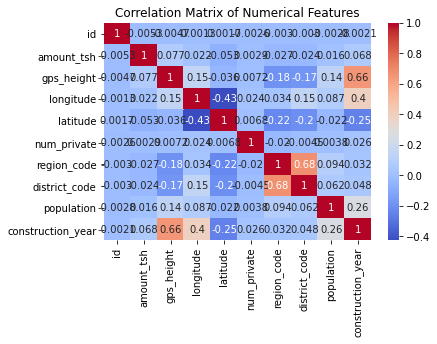


Grouped Analysis by Target Variable:


status_group
functional                 461.798235
functional needs repair    267.071577
non functional             123.481230
Name: amount_tsh, dtype: float64

In [18]:
# Correlation matrix for numerical features
print("\nCorrelation Matrix:")
corr_matrix = train_data.corr()
display(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Grouped analysis for categorical features
# Example: Grouping by 'status_group' and checking the mean of a numerical feature
print("\nGrouped Analysis by Target Variable:")
display(train_data.groupby('status_group')['amount_tsh'].mean())

> **Key Observations on the Correlation Matrix:**
> - `gps_height` and `construction_year` have a strong positive correlation of 0.659 which is closer to +1. This suggests that newer constructions tend to be at higher altitudes.
> - `longitude` and `construction_year` have a moderate positive correlation of 0.397, wich indicates that newer costructions might be located in specific places.
> - Most other features have low or no significant correlation with each other, as indicated by values close to 0

> **Key Observations on the Grouped Analysis by Target Variable:**
> - I performed an analysis showing the average `amount_tsh` for each category in the `status_group` target variable:
> - For `functional` pumps requires an average `amount_tsh` of 461.80 Tsh.
> - For `functional needs repair` pumps requires an average `amount_tsh` of 267.07 Tsh.
> - For `non functional` pumps requires an average `amount_tsh` of 123.48 Tsh.
>> - From the above we can see that functional water pumps tend to have a higher `amount_tsh`.
>> - This means that better-funded pumps are more likely to be functional while lower funded pumps are more likely to be non-functional or needs repair.

#### Missing Values Analysis


Missing Data by Count


funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64


 Missing Data by Percentage


id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

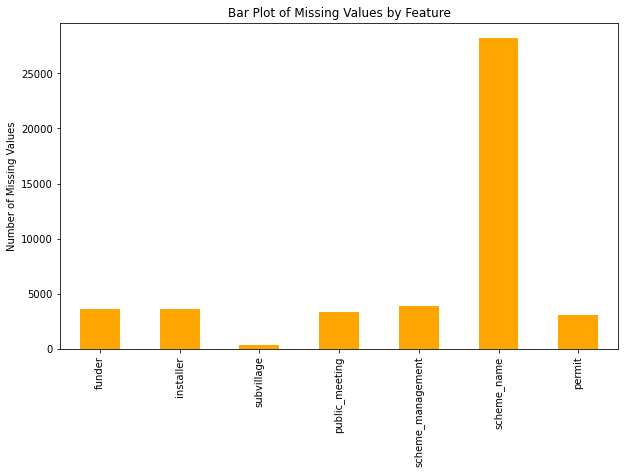

In [25]:
missing_data = train_data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("\nMissing Data by Count")
display(missing_data)
missing_percent = (missing_values / len(train_data)) * 100
print("\n Missing Data by Percentage")
display(missing_percentage)
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Bar Plot of Missing Values by Feature")
plt.ylabel("Number of Missing Values")
plt.show()

> **Key Insights:**
>- `scheme_name` has the most significant proportion of missing values almost 47.4% of the data.
> - `funder` and `installer` seem like key features that could indicate who is responsible for the functionality of the water points.
> - `public_meeting` and `permit` are categorical features with missing values which might reflect the administration or governance aspects of water points

# 3. Data Preparation

In this section we will be preparing the data to be used address skewness of data and handling of outliers